In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:/Universities/UNAD/semestres/Octavo semestre/data analysis/tarea 4/mall_customers_data_set/Mall_Customers.csv")

In [5]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

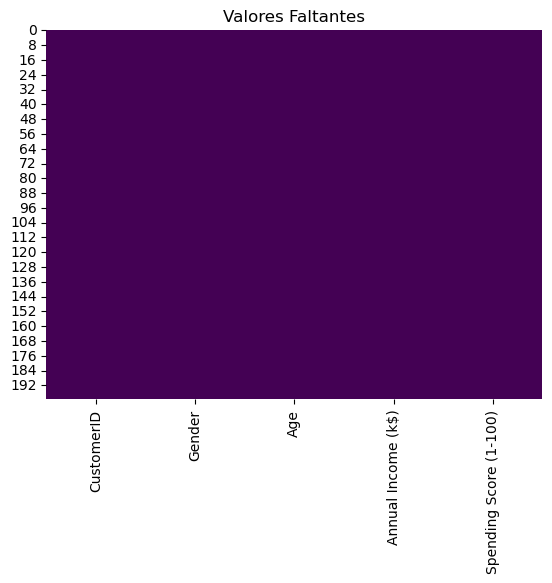

In [9]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores Faltantes")
plt.show()

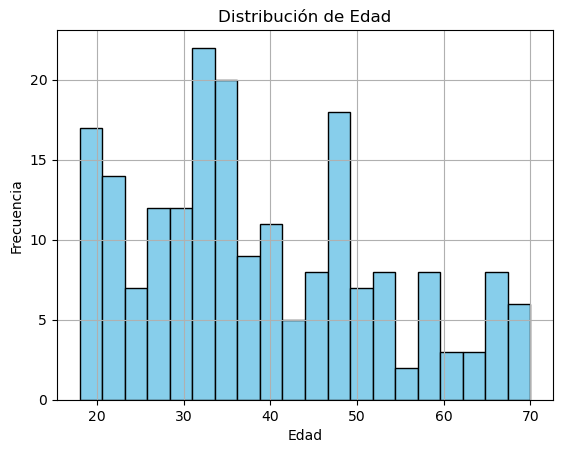

In [11]:
df["Age"].hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

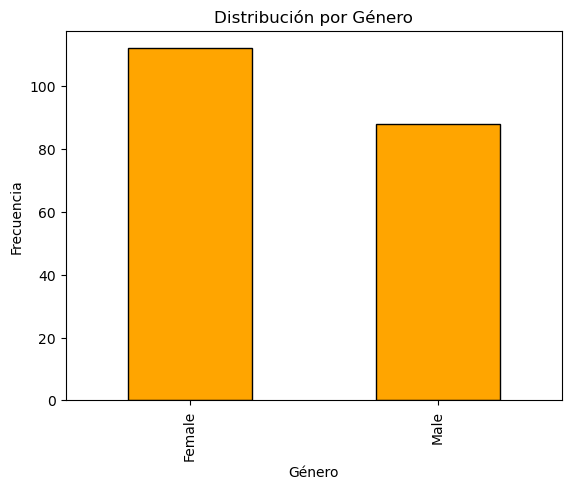

In [15]:
df["Gender"].value_counts().plot(kind="bar", color="orange", edgecolor="black")
plt.title("Distribución por Género")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

print(df_scaled[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


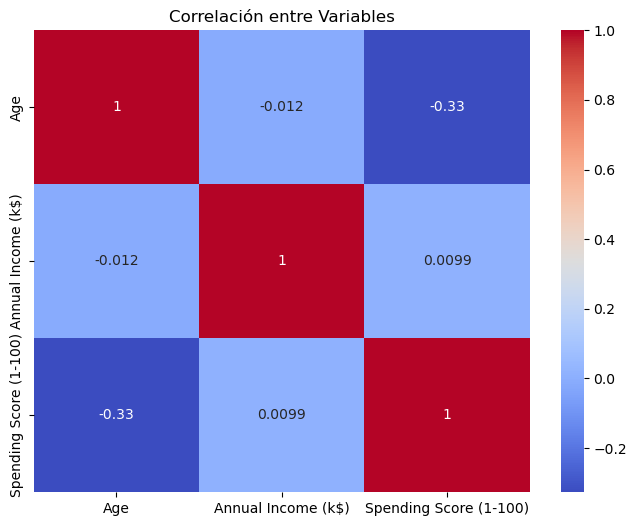

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre Variables")
plt.show()

In [21]:
df_final = pd.DataFrame(df_scaled, columns=features)
print(df_final.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


In [23]:
linkage_matrix = linkage(df_final, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()


NameError: name 'linkage' is not defined

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

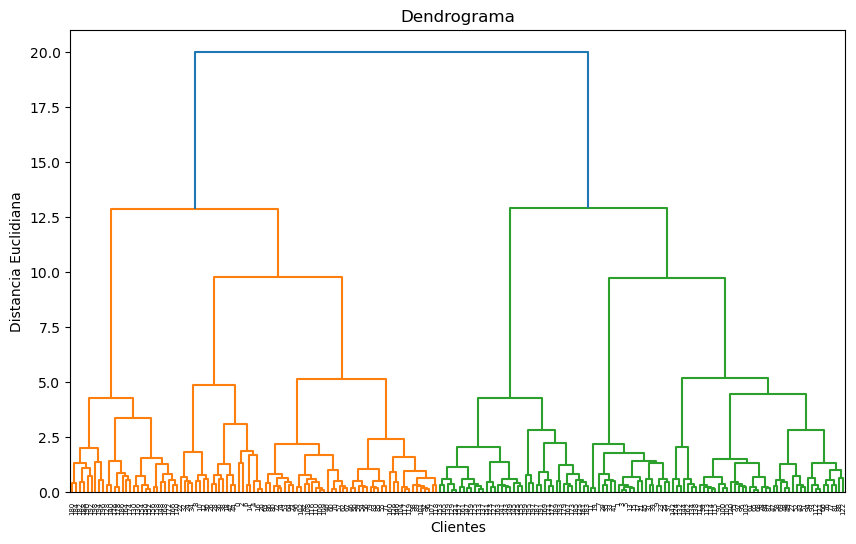

In [27]:
linkage_matrix = linkage(df_final, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [29]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

model.fit(df_final)

labels = model.labels_
print("Etiquetas de Clustering:", labels)


TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [31]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')

model.fit(df_final)

labels = model.labels_
print("Etiquetas de Clustering:", labels)

Etiquetas de Clustering: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 2 1 2 0 2 3 2 3 2 1 2 1 2 3 2 1 2 3 2 1 2 1 2 0 2
 3 2 3 2 3 2 3 2 3 2 3 2 0 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


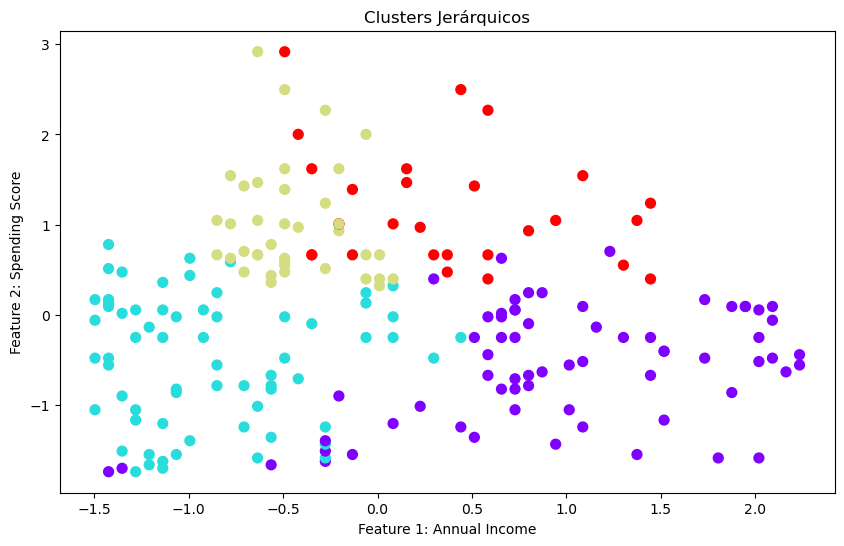

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final.iloc[:, 0], df_final.iloc[:, 1], c=labels, cmap="rainbow", s=50)
plt.title("Clusters Jerárquicos")
plt.xlabel("Feature 1: Annual Income")
plt.ylabel("Feature 2: Spending Score")
plt.show()

In [35]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg = silhouette_score(df_final, labels)
calinski_harabasz = calinski_harabasz_score(df_final, labels)
davies_bouldin = davies_bouldin_score(df_final, labels)

print("Coeficiente de Silhouette:", silhouette_avg)
print("Índice de Calinski-Harabasz:", calinski_harabasz)
print("Índice de Davies-Bouldin:", davies_bouldin)

Coeficiente de Silhouette: 0.3614512741691407
Índice de Calinski-Harabasz: 102.01939926024943
Índice de Davies-Bouldin: 1.0163821773024595


In [37]:
# Scatterplot 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'], 
    y=df['Spending Score (1-100)'], 
    hue=df['Cluster'], 
    palette='Set1', 
    s=100
)
plt.title("Clusters Jerárquicos - Distribución de Clientes")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntuación de Gasto")
plt.legend(title="Cluster")
plt.show()

# Boxplot para analizar distribuciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='Set2')
plt.title("Distribución de Puntuación de Gasto por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Puntuación de Gasto")
plt.show()

KeyError: 'Cluster'

<Figure size 1000x600 with 0 Axes>

In [39]:
df['Cluster'] = labels

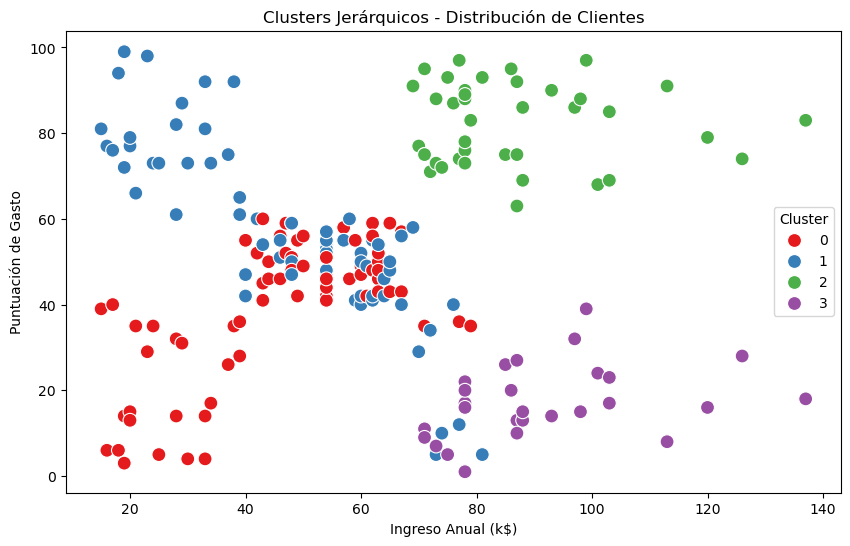

C:\Users\david\AppData\Local\Temp\ipykernel_16020\2364742454.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='Set2')


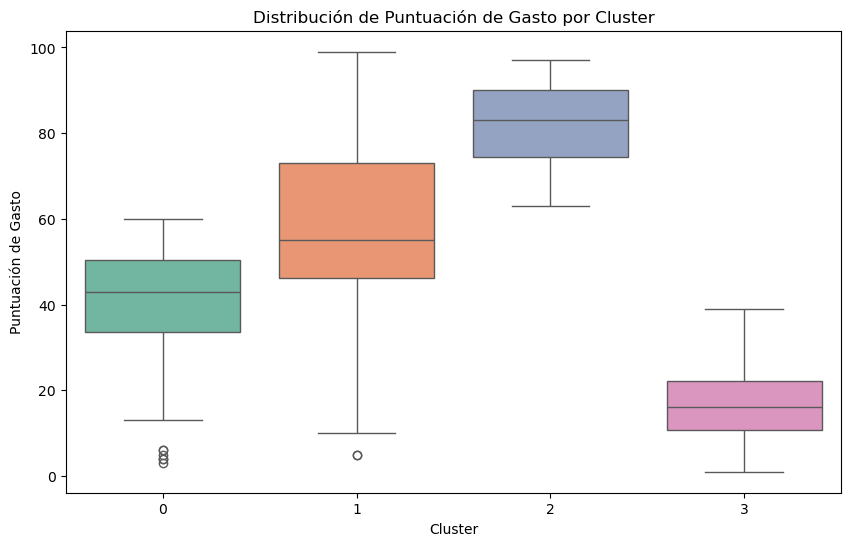

In [41]:
# Scatterplot 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'], 
    y=df['Spending Score (1-100)'], 
    hue=df['Cluster'], 
    palette='Set1', 
    s=100
)
plt.title("Clusters Jerárquicos - Distribución de Clientes")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntuación de Gasto")
plt.legend(title="Cluster")
plt.show()

# Boxplot para analizar distribuciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='Set2')
plt.title("Distribución de Puntuación de Gasto por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Puntuación de Gasto")
plt.show()